![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Classification of Lung X-ray in Three Classes:

* Class 0: 'normal'

* Class 1: 'pneumo'

* Class 2: 'covid'

WARNING: This example is for pedagogical purposes only. In no way should it be used to diagnose COVID. If used in a clinical application, thousands of images would be needed to validate this method.


Based on https://medium.com/thecyphy/train-cnn-model-with-pytorch-21dafb918f48

In [ ]:
!wget https://www.dropbox.com/s/2e1n9oap1thovo7/rxcovid64.zip
!unzip -qq rxcovid64.zip

--2023-07-19 14:08:40--  https://www.dropbox.com/s/2e1n9oap1thovo7/rxcovid64.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2e1n9oap1thovo7/rxcovid64.zip [following]
--2023-07-19 14:08:41--  https://www.dropbox.com/s/raw/2e1n9oap1thovo7/rxcovid64.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucff3fef5e805f509fb20ff3dd40.dl.dropboxusercontent.com/cd/0/inline/CAJ2kzSUPYSmg60lBj8f8gdGLRRZYfgUfl6KsiCVg-cjqJ9hxplbf7gtEhsFu8btLW4eqzBAoftMjLnzlD7Pd-Nds8jHGijDJ-m-zY2fT_vUb88xC67R_ysH_Wpy8adowxAmlYVDtPTFKMaC6SYqAx_K92lANXNvalJKRStHN5bxAQ/file# [following]
--2023-07-19 14:08:41--  https://ucff3fef5e805f509fb20ff3dd40.dl.dropboxusercontent.com/cd/0/inline/CAJ2kzSUPYSmg60lBj8f8gdGLRRZYfgUfl6KsiCVg-cjqJ9hxplbf7gtEhsFu8btLW4eqzBAof

In [ ]:
import torch
import torchvision
from   torchvision import transforms
from   torchvision.datasets import ImageFolder
from   torch.utils.data.dataloader import DataLoader
from   torch.utils.data import random_split
from   sklearn.metrics import confusion_matrix, accuracy_score

#train and test data directory

train_dir = "rxcovid64/train/"
val_dir   = "rxcovid64/val/"
test_dir  = "rxcovid64/test/"

#load the train and test data
train_set = ImageFolder(train_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.RandomHorizontalFlip(),transforms.ToTensor()]))

val_set = ImageFolder(val_dir,transform = transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

test_set = ImageFolder(test_dir,transforms.Compose([
    transforms.Resize((64,64)),transforms.ToTensor()]))

img,_ = train_set[0]
print('Size image: '+ str(img.shape))
print('   Classes: ',train_set.classes)

Size image: torch.Size([3, 64, 64])
   Classes:  ['class_0', 'class_1', 'class_2']


In [ ]:
!wget https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
from cnn_utils import *
print('cnn_utils module has been loaded')

--2023-07-19 14:10:55--  https://www.dropbox.com/s/2q224dslxdiag7i/cnn_utils.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2q224dslxdiag7i/cnn_utils.py [following]
--2023-07-19 14:10:56--  https://www.dropbox.com/s/raw/2q224dslxdiag7i/cnn_utils.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9cb47487937db074d76248997e.dl.dropboxusercontent.com/cd/0/inline/CAInklELRso5uKW7Ns6QdGKy6rhjKIYYk2F4kW3Zbje9Xyqh6trGe7J_ikXlHzQOoze9HoJPBlmkeQpbHUEOwEdiZFaHo_ZT1TVP-svShvgOYbrgvnJ8hYz5olmWuNlINloJAcVD-z3dukNF7nlJXUBzJt2A--yWlq5TAvGoGT21rg/file# [following]
--2023-07-19 14:10:56--  https://uc9cb47487937db074d76248997e.dl.dropboxusercontent.com/cd/0/inline/CAInklELRso5uKW7Ns6QdGKy6rhjKIYYk2F4kW3Zbje9Xyqh6trGe7J_ikXlHzQOoze9HoJPBlmke

Image: 1125, Label : class_0


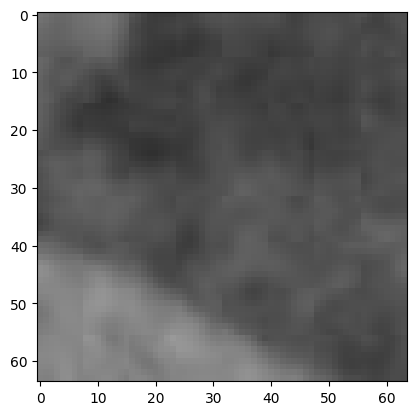

In [ ]:
#display an image in the training dataset
display_img(train_set,1125)

In [ ]:
#load the train and validation into batches.

batch_size = 144

print(f"Length of Train Data : {len(train_set)}")
print(f"Length of Validation Data : {len(val_set)}")

train_dl = DataLoader(train_set, batch_size, shuffle = True, num_workers = 2, pin_memory = True)
val_dl   = DataLoader(val_set  , batch_size, num_workers = 4, pin_memory = True)

Length of Train Data : 12960
Length of Validation Data : 4320


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


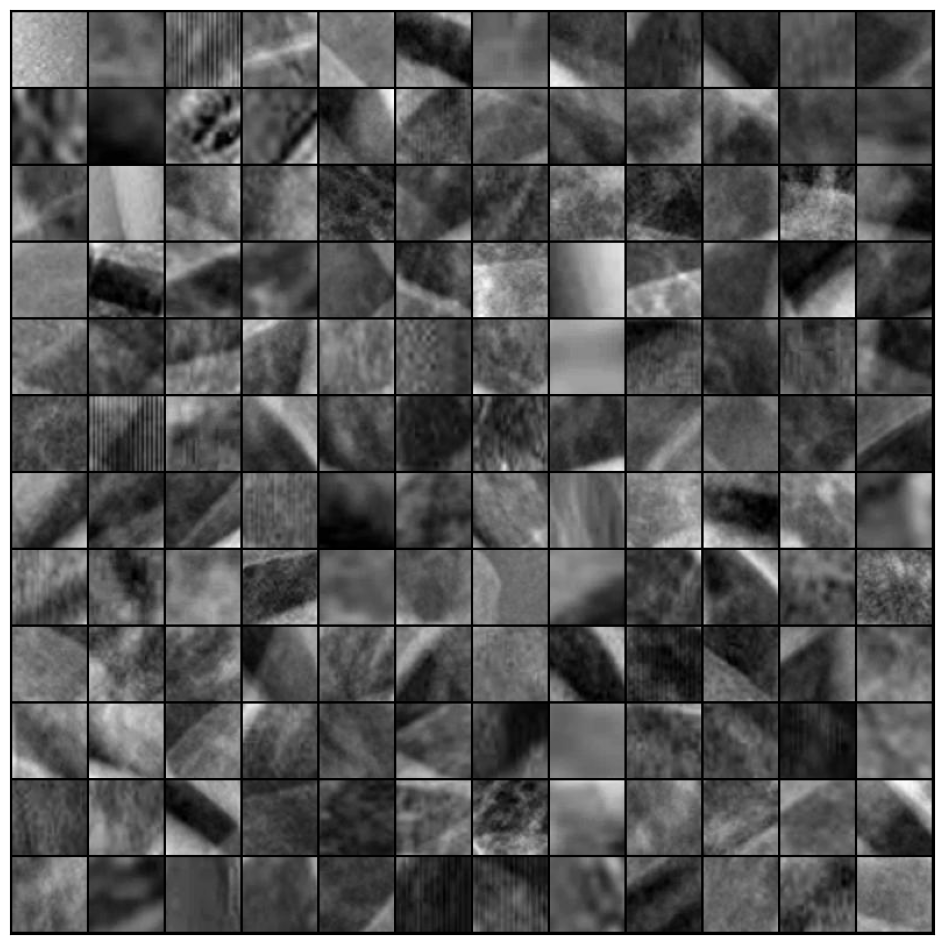

In [ ]:
show_batch(train_dl,nrow=12)

In [ ]:
# Reduced Model
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 8, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(8,16, kernel_size = 3, stride = 2, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(16, 32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,32, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(2048,1024),
            nn.Linear(1024,128),
            nn.Linear(128,3),
            nn.Dropout(0.25)
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
# Large Model
class CNN_Classification(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(

            nn.Conv2d(3, 32, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(32,64, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(64, 128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Conv2d(128, 256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),

            nn.Flatten(),
            nn.Linear(16384,128), #1024
            nn.ReLU(),
            nn.Linear(128, 64), #512
            nn.ReLU(),
            nn.Linear(64,3) #6
        )

    def forward(self, xb):
        return self.network(xb)


In [ ]:
model =  CNN_Classification()
print(model)

CNN_Classification(
  (network): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=2048, out_features=1024, bias=True)
    (12): Linear(in_features=1024, out_features=128, bias=True)
    (13): Linear(in_features=128, out_features=3, bias=True)
    (14): Dropout(p=0.25, inplace=False)
  )
)


In [ ]:
#fitting the model on training data and record the result after each epoch
num_epochs = 100
opt_func   = torch.optim.Adam
lr         = 0.0005
history    = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch    Train-Loss   Val-Loss    Val-Acc   Best    Time [sec]
------------------------------------------------------------------
    0      1.0769      1.1827      0.3181    ***      30.4 
    1      1.0584      1.1374      0.3190    ***      25.6 
    2      1.0568      1.1389      0.3037             26.2 
    3      1.0483      1.1522      0.3266    ***      25.6 
    4      1.0486      1.1413      0.3185             25.1 
    5      1.0441      1.1571      0.3236             26.4 
    6      1.0383      1.1484      0.3109             26.1 
    7      1.0316      1.1888      0.3303    ***      26.5 
    8      1.0148      1.3390      0.2088             26.8 
    9      0.9708      1.8755      0.2410             25.7 
   10      0.9045      1.6128      0.2440             25.8 
   11      0.8543      1.9575      0.2778             26.3 
   12      0.8104      1.9709      0.2417             25.9 
   13      0.7633      2.0708      0.2907             25.6 
   14      0.7545      1.5489 

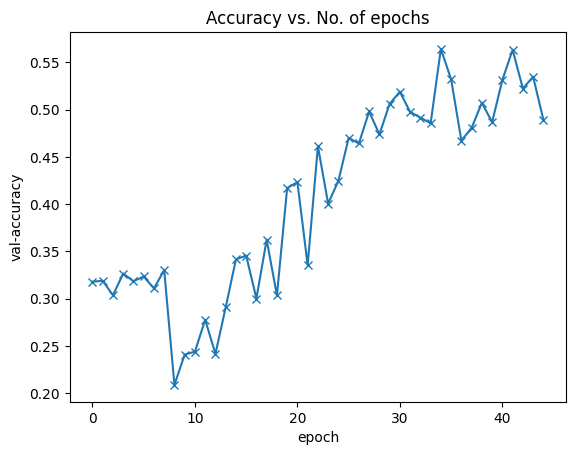

In [ ]:
plot_accuracies(history)

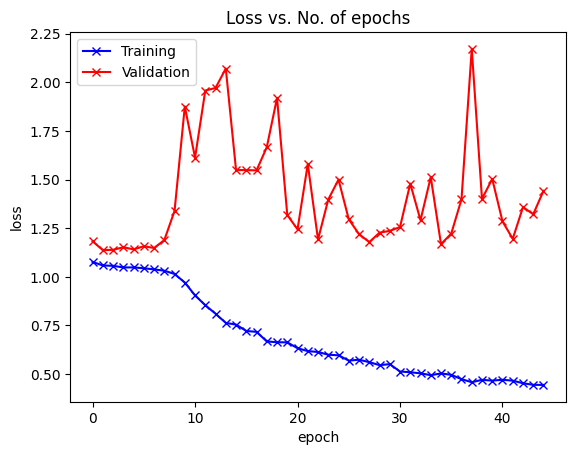

In [ ]:
plot_losses(history)

In [ ]:
model = load_model(CNN_Classification,'best_model.pt')

best_model.pt loaded.


In [ ]:
ytest = get_labels(model,test_set)
ypred = get_prediction(model,test_set)

acc   = accuracy_score(ytest,ypred)
C     = confusion_matrix(ytest,ypred)

print('Performance on Testing subset:')
print('Accuracy:')
print(acc)
print(' ')
print('Confusion Matrix = ')
print(C)

Performance on Testing subset:
Accuracy:
0.6583333333333333
 
Confusion Matrix = 
[[ 705  187  308]
 [  69 1078   53]
 [ 252  361  587]]


In [ ]:
C1,acc1 = performance(model,train_set,'Training')
C2,acc2 = performance(model,val_set,'Validation')
C3,acc3 = performance(model,test_set,'Testing')

Training Confusion Matrix = 
[[3327  786  207]
 [ 146 3922  252]
 [ 106  657 3557]]
 
Training Accuracy = 0.8338
 
Validation Confusion Matrix = 
[[ 502  308  630]
 [ 248 1015  177]
 [ 379  140  921]]
 
Validation Accuracy = 0.5644
 
Testing Confusion Matrix = 
[[ 705  187  308]
 [  69 1078   53]
 [ 252  361  587]]
 
Testing Accuracy = 0.6583
 
